In [33]:
using Statistics, LinearAlgebra, CSV, DataFramesMeta
using Plots
using Printf
using RemoteREPL
@async serve_repl()

Task (failed) @0x0000013914369f10
IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
  [1] uv_error
    @ .\libuv.jl:100 [inlined]
  [2] #listen#13
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:628 [inlined]
  [3] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:627 [inlined]
  [4] #listen#10
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:621 [inlined]
  [5] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:618 [inlined]
  [6] #listen#12
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [7] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [

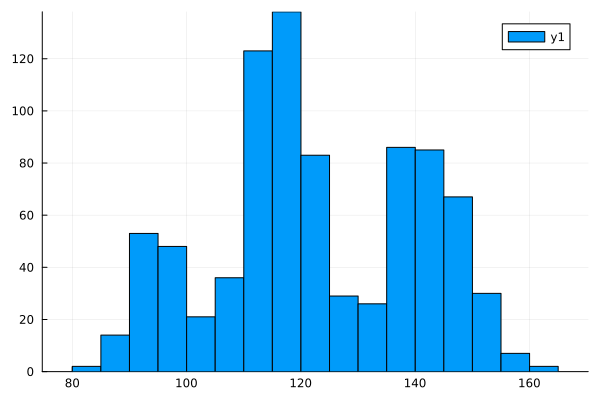

In [34]:
data = CSV.read("Results.csv", DataFrame)
data = data[data[!,2] .> 50, :]
histogram(data[:, 2])

In [35]:
data[:,2] |> median

119.0

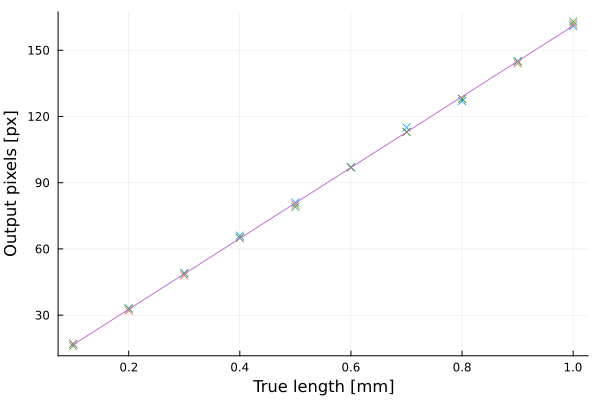

In [36]:
strs = [string("data\\",i,".",j,".csv") for i in 1:4 for j in 1:2]
data = CSV.read.(strs, DataFrame)


xs = truelength = ((0.1:0.1:1) |> collect)
ys = calibration = [
    17  17  16;
    33  32  33;
    49  48  49;
    66  65  65;
    81  80  79;
    97  97  97;
    115 113 113;
    127 128 128;
    145 144 145;
    161 162 163
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [37]:

cehck = (data[1][:,2] .>= 0) .&& (data[1][:,2] .<5)
histogram(data[1][:,2])
quantile.([data[8][:,2]], 0.0:0.1:1)
data[1]
for i in 1:8
    sort!(data[i], "Area")
    data[i][:,2] .*= 1/β_1^2
end


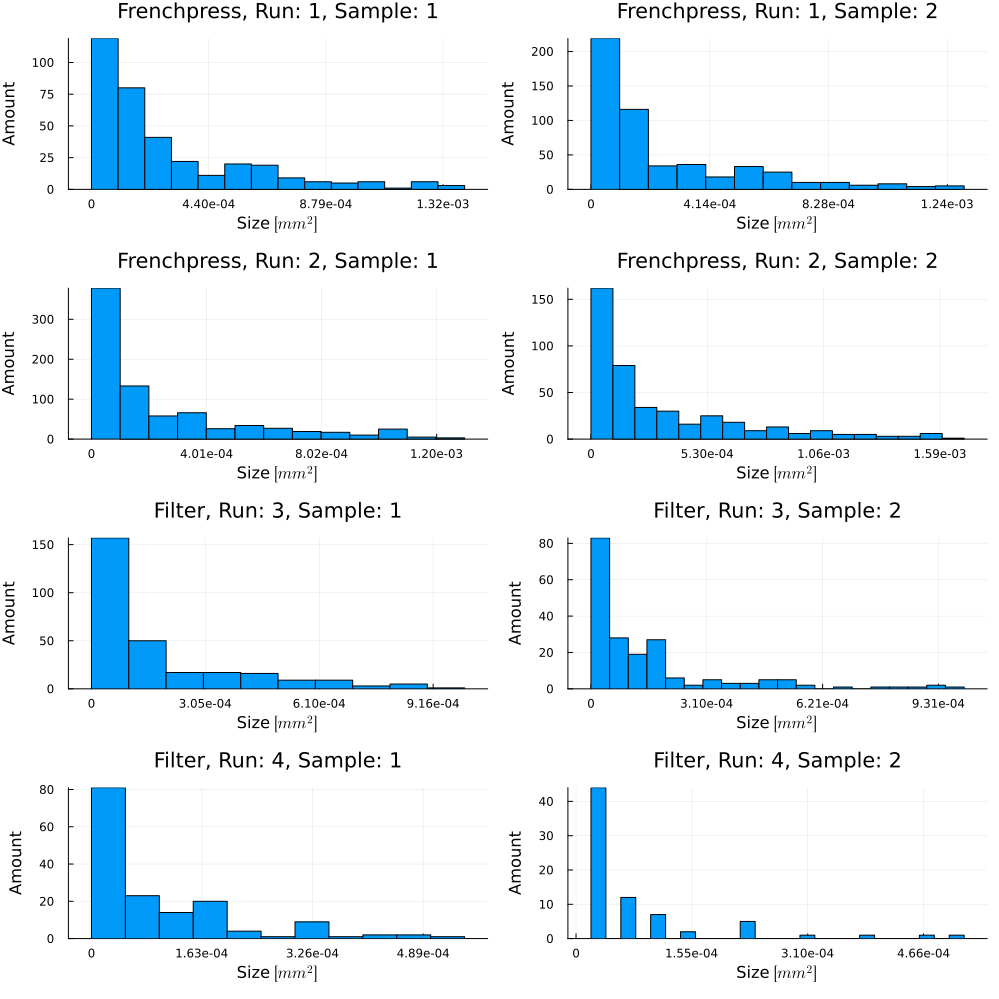

In [38]:
runs = ["Frenchpress", "Frenchpress", "Filter", "Filter"]
sample = [-(i%2)+2 for i in 1:8]
run = [i÷2 for i in 2:9]
plts = [histogram(
        data[i][1:findfirst(
            x -> x > quantile(data[i][:, 2], 0.9), 
            data[i][:, 2]
        ), 2],
        xticks=(
            [
            quantile(data[i][:, 2], 0.9)*j for j in 0:(1/3):1],
            (
                [quantile(data[i][:, 2], 0.9)*j for j in (1/3):(1/3):1] 
                .|> x-> @sprintf("%.2e", x)
            ) |> x->vcat("0", x)
            ),
        legend = :none,
        title = string(runs[run[i]],", Run: ", run[i], ", Sample: ", sample[i])
    ) for i in 1:8]
# plts = [histogram(data[i][:,2]) for i in 1:8]
plot(plts..., layout=(4,2),
    size=(1000,1000),
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
)


In [39]:
means = [mean(data[i][1:findfirst(
        x -> x > quantile(data[i][:, 2], 0.9), 
        data[i][:, 2]
        ), 2]
    ) for i in 1:8]
# means = [mean(data[i][:,2]
#     ) for i in 1:8]

mean(means[1:4])/mean(means[5:8])

2.0919998673444455

# Filter

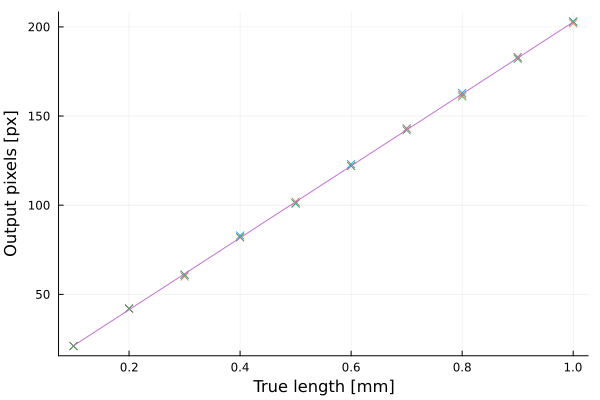

In [43]:
fstrs = [string("filter",i,".csv") for i in 1:3]
fdata = CSV.read.(fstrs, DataFrame)



xs = truelength = ((0.1:0.1:1) |> collect)
ys = calibration = [
    21  21  21;
    42  42  42; 
    61  60  61; 
    83  82  82;
    101 102 101;
    123 122 122;
    143 143 142;
    163 162 161;
    183 183 182;
    203 202 203
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [44]:
for i in 1:3
    sort!(fdata[i], "Area")
    fdata[i][:,2] .*= 1/β_1^2
end

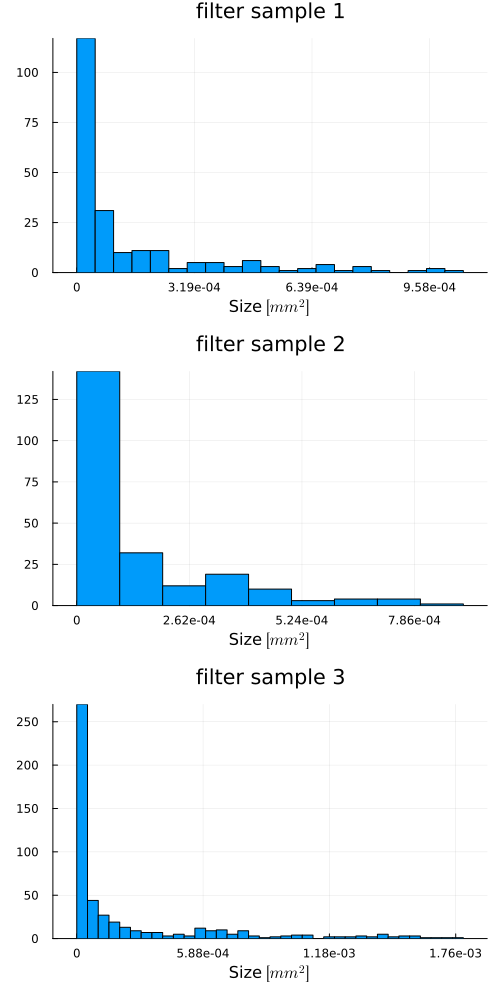

In [53]:
plts = [histogram(
        fdata[i][1:findfirst(
            x -> x > quantile(fdata[i][:, 2], 0.9), 
            fdata[i][:, 2]
        ), 2],
        xticks=(
            [
            quantile(fdata[i][:, 2], 0.9)*j for j in 0:(1/3):1],
            (
                [quantile(fdata[i][:, 2], 0.9)*j for j in (1/3):(1/3):1] 
                .|> x-> @sprintf("%.2e", x)
            ) |> x->vcat("0", x)
            ),
        legend = :none,
        title = "Filter sample $i"
    ) for i in 1:3]
# plts = [histogram(fdata[i][:,2]) for i in 1:3]
plot(plts..., layout=(3,1),
    size=(500,1000),
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
)